In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./NN_data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
data.shape

(4600, 18)

In [4]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
to_drop=['date','street','statezip','country']

In [6]:
data.drop(columns=to_drop,inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


### Calculating the age of house

In [8]:
data[data['yr_renovated']!=0]['yr_renovated'].min()

1912

In [11]:
# How old is the house?
data['House_age']=[2023-yr_built for yr_built in data['yr_built']]
data.House_age

0        68
1       102
2        57
3        60
4        47
       ... 
4595     69
4596     40
4597     14
4598     49
4599     33
Name: House_age, Length: 4600, dtype: int64

In [14]:
# was the house renovated?
data['Was_renovated']=[1 if yr_renovated !=0 else 0 for yr_renovated in data['yr_renovated']]
data.Was_renovated

0       1
1       0
2       0
3       0
4       1
       ..
4595    1
4596    1
4597    0
4598    0
4599    0
Name: Was_renovated, Length: 4600, dtype: int64

In [15]:
# Is the renovation recent?
data['was_renovated_10yrs']=[1 if (2023-yr_renovated)<=10 else 0 for yr_renovated in data['yr_renovated']]
data.was_renovated_10yrs

0       0
1       0
2       0
3       0
4       0
       ..
4595    0
4596    0
4597    0
4598    0
4599    0
Name: was_renovated_10yrs, Length: 4600, dtype: int64

In [16]:
data.drop(columns=['yr_renovated','yr_built'], inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House age,House_age,Was_renovated,was_renovated_10yrs
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,68,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,102,102,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,57,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,60,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,47,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,69,69,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,40,40,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,14,14,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,49,49,0,0


In [17]:
data.query("was_renovated_10yrs==1")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House age,House_age,Was_renovated,was_renovated_10yrs
28,675000.0,5.0,2.50,2820,67518,2.0,0,0,3,2820,0,Issaquah,44,44,1,1
34,400000.0,4.0,2.50,3630,42884,1.5,0,0,3,2300,1330,Auburn,44,44,1,1
51,550000.0,3.0,1.75,2910,35200,1.5,0,0,3,2910,0,Sammamish,44,44,1,1
80,627000.0,4.0,2.25,1990,7712,1.0,0,0,3,1210,780,Issaquah,50,50,1,1
162,312000.0,4.0,2.00,1300,7054,1.0,0,0,3,1300,0,Seattle,73,73,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2199900.0,4.0,1.50,1120,5427,1.0,0,0,3,1120,0,Covington,54,54,1,1
4388,300000.0,3.0,2.00,1510,7066,1.0,0,2,3,1230,280,Seattle,50,50,1,1
4399,257500.0,4.0,1.75,2420,7672,1.0,0,0,3,1480,940,Issaquah,44,44,1,1
4530,362750.0,2.0,1.75,1240,3000,1.5,0,0,3,1240,0,Seattle,117,117,1,1


In [19]:
data.was_renovated_10yrs.value_counts()

0    4467
1     133
Name: was_renovated_10yrs, dtype: int64

In [20]:
data.city.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [21]:
data[data['price']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House age,House_age,Was_renovated,was_renovated_10yrs
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,Federal Way,61,61,0,0
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,Seattle,63,63,1,0
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,Burien,70,70,1,0
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,Issaquah,40,40,0,0
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,Burien,103,103,0,0
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,Sammamish,33,33,1,0
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,Enumclaw,16,16,0,0
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,Normandy Park,63,63,1,0
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,Snoqualmie,17,17,0,0
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,Bellevue,10,10,1,0


In [22]:
data[data['price']!=0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,House age,House_age,Was_renovated,was_renovated_10yrs
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,68,68,1,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,102,102,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,57,57,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,60,60,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,47,47,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,Seattle,69,69,1,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,Bellevue,40,40,1,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,Renton,14,14,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,Seattle,49,49,0,0


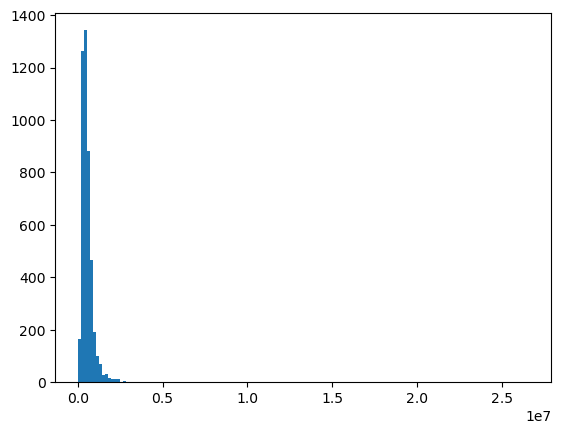

In [27]:
plt.hist(data['price'],bins=150);